# Imports

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

import numpy as np
import PIL
import PIL.Image

# Data Loading

In [63]:
#https://keras.io/api/data_loading/

BATCH_SIZE = 32
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

train_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=212,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE)

val_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed=212,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE)


Found 1229 files belonging to 6 classes.
Using 984 files for training.
Found 1229 files belonging to 6 classes.
Using 245 files for validation.


['china_coins', 'euro_coins', 'indian_coins', 'peso_coins', 'us_coins', 'yen_coins']
(32, 128, 128, 3)
(32,)


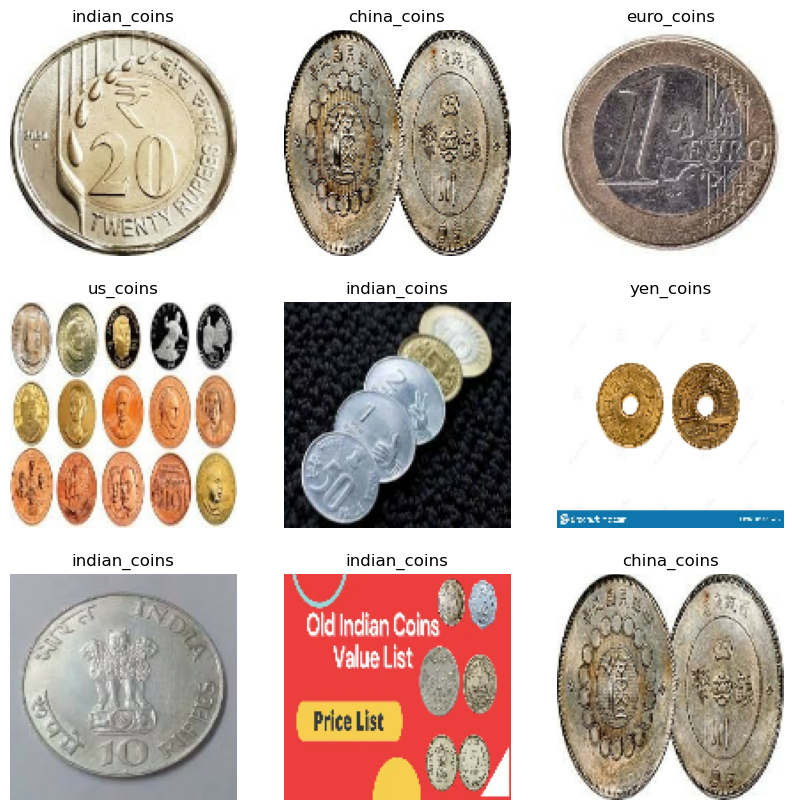

In [64]:
#https://www.tensorflow.org/tutorials/load_data/images

import matplotlib.pyplot as plt

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


# Model

In [88]:
#https://www.tensorflow.org/tutorials/images/classification#visualize_training_results

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [89]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 128)     

In [90]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
31/31 [==============================] - 19s 571ms/step - loss: 1.8981 - accuracy: 0.2022 - val_loss: 1.7716 - val_accuracy: 0.2449
Epoch 2/10
31/31 [==============================] - 16s 520ms/step - loss: 1.7147 - accuracy: 0.2927 - val_loss: 1.7349 - val_accuracy: 0.2898
Epoch 3/10
31/31 [==============================] - 18s 575ms/step - loss: 1.5729 - accuracy: 0.3709 - val_loss: 1.6641 - val_accuracy: 0.3388
Epoch 4/10
31/31 [==============================] - 14s 456ms/step - loss: 1.3701 - accuracy: 0.4746 - val_loss: 1.6393 - val_accuracy: 0.3551
Epoch 5/10
31/31 [==============================] - 15s 469ms/step - loss: 1.1710 - accuracy: 0.5528 - val_loss: 1.5341 - val_accuracy: 0.4490
Epoch 6/10
31/31 [==============================] - 19s 591ms/step - loss: 0.9178 - accuracy: 0.6667 - val_loss: 1.4590 - val_accuracy: 0.5143
Epoch 7/10
31/31 [==============================] - 18s 560ms/step - loss: 0.7119 - accuracy: 0.7459 - val_loss: 1.4425 - val_accuracy: 0.5429

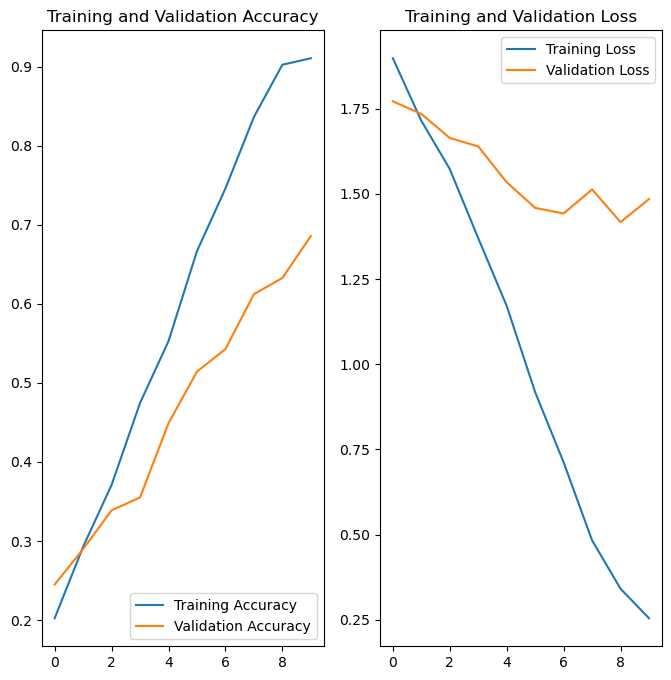

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
